In [4]:
import pandas as pd
import quandl
quandl.ApiConfig.api_key="r3VFHH1s8c57hq7_fQMd"

In [5]:
%matplotlib notebook
import mpld3
mpld3.enable_notebook()
import pickle
import math
import numpy as np
from sklearn import preprocessing,svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [6]:
df = quandl.get('WIKI/GOOGL')
df.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2004-08-19,100.01,104.06,95.96,100.335,44659000.0,0.0,1.0,50.159839,52.191109,48.128568,50.322842,44659000.0
2004-08-20,101.01,109.08,100.50,108.310,22834300.0,0.0,1.0,50.661387,54.708881,50.405597,54.322689,22834300.0
2004-08-23,110.76,113.48,109.05,109.400,18256100.0,0.0,1.0,55.551482,56.915693,54.693835,54.869377,18256100.0
2004-08-24,111.24,111.60,103.57,104.870,15247300.0,0.0,1.0,55.792225,55.972783,51.945350,52.597363,15247300.0
2004-08-25,104.76,108.00,103.88,106.000,9188600.0,0.0,1.0,52.542193,54.167209,52.100830,53.164113,9188600.0


In [7]:
df = df[['Adj. Open','Adj. High','Adj. Low','Adj. Close','Adj. Volume']]

In [8]:
df.head()

,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,
2004-08-19,50.159839,52.191109,48.128568,50.322842,44659000.0
2004-08-20,50.661387,54.708881,50.405597,54.322689,22834300.0
2004-08-23,55.551482,56.915693,54.693835,54.869377,18256100.0
2004-08-24,55.792225,55.972783,51.945350,52.597363,15247300.0
2004-08-25,52.542193,54.167209,52.100830,53.164113,9188600.0


In [9]:
df['HL_per'] = (df['Adj. High']-df['Adj. Low'])/df['Adj. Close'] * 100
df['OC_per'] = (df['Adj. Close']-df['Adj. Open'])/df['Adj. Open'] * 100
df.head()

,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume,HL_per,OC_per
Date,,,,,,,
2004-08-19,50.159839,52.191109,48.128568,50.322842,44659000.0,8.072956,0.324968
2004-08-20,50.661387,54.708881,50.405597,54.322689,22834300.0,7.921706,7.227007
2004-08-23,55.551482,56.915693,54.693835,54.869377,18256100.0,4.049360,-1.227880
2004-08-24,55.792225,55.972783,51.945350,52.597363,15247300.0,7.657099,-5.726357
2004-08-25,52.542193,54.167209,52.100830,53.164113,9188600.0,3.886792,1.183658


In [10]:
df = df[['Adj. Close','HL_per','OC_per','Adj. Volume']]
df.head()

,Adj. Close,HL_per,OC_per,Adj. Volume
Date,,,,
2004-08-19,50.322842,8.072956,0.324968,44659000.0
2004-08-20,54.322689,7.921706,7.227007,22834300.0
2004-08-23,54.869377,4.049360,-1.227880,18256100.0
2004-08-24,52.597363,7.657099,-5.726357,15247300.0
2004-08-25,53.164113,3.886792,1.183658,9188600.0


In [11]:
df.count()

Adj. Close     3424
HL_per         3424
OC_per         3424
Adj. Volume    3424
dtype: int64

In [12]:
df.fillna(-99999,inplace=True)

In [13]:
forecast_col = 'Adj. Close'

In [14]:

forecast_out = int(math.ceil(0.01*len(df)))

In [15]:
forecast_out

35

In [16]:
df['label'] = df[forecast_col].shift(-forecast_out)
df.head()

,Adj. Close,HL_per,OC_per,Adj. Volume,label
Date,,,,,
2004-08-19,50.322842,8.072956,0.324968,44659000.0,69.078238
2004-08-20,54.322689,7.921706,7.227007,22834300.0,67.839414
2004-08-23,54.869377,4.049360,-1.227880,18256100.0,68.912727
2004-08-24,52.597363,7.657099,-5.726357,15247300.0,70.668146
2004-08-25,53.164113,3.886792,1.183658,9188600.0,71.219849


In [17]:

df.tail()

,Adj. Close,HL_per,OC_per,Adj. Volume,label
Date,,,,,
2018-03-21,1094.00,1.964351,0.130884,1990515.0,NaN
2018-03-22,1053.15,3.254997,-2.487014,3418154.0,NaN
2018-03-23,1026.55,4.082607,-2.360729,2413517.0,NaN
2018-03-26,1054.09,4.619150,0.332191,3272409.0,NaN
2018-03-27,1006.94,6.645878,-5.353887,2940957.0,NaN


In [28]:
X = np.array(df.drop(['label'], 1))


In [29]:
X = preprocessing.scale(X)
X_lately = X[-forecast_out:]
X = X[:-forecast_out]

In [30]:
df_drop = df.dropna()
y = np.array(df_drop['label'])

In [31]:
len(X)

3389

In [32]:
len(y)

3389

In [33]:
y

array([  69.0782379 ,   67.83941377,   68.91272699, ..., 1026.55      ,
       1054.09      , 1006.94      ])

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [35]:
model_linear = LinearRegression()
model_linear.fit(X_train,y_train)
with open('linearregression.pickle','wb') as f:
    pickle.dump(model_linear, f)

pickle_in = open('linearregression.pickle','rb')
model_linear = pickle.load(pickle_in)
acc = model_linear.score(X_test,y_test)
acc

0.9773929347231334

In [36]:
forecast_set = model_linear.predict(X_lately)

In [37]:
forecast_set

array([1103.00287831, 1074.70994728, 1020.7235361 , 1060.69350055,
       1075.44906282, 1076.02800503, 1093.91463052, 1112.59720142,
       1117.59872373, 1125.16216429, 1135.03871639, 1131.82123374,
       1150.63272174, 1166.95798374, 1138.40098982, 1124.91645776,
       1089.59977961, 1104.49570208, 1116.11978097, 1123.75151613,
       1137.02536494, 1152.49604978, 1183.30334426, 1188.77372773,
       1159.59950716, 1171.69228052, 1172.66332141, 1155.70033867,
       1120.30260045, 1117.02385847, 1115.61413027, 1072.00201911,
       1044.4943929 , 1072.15949215, 1021.24474108])

In [38]:
df.tail(35)

,Adj. Close,HL_per,OC_per,Adj. Volume,label
Date,,,,,
2018-02-06,1084.43,5.290337,4.879205,3732527.0,NaN
2018-02-07,1055.41,3.023470,-2.724499,2544683.0,NaN
2018-02-08,1005.60,5.848250,-5.120439,3067173.0,NaN
2018-02-09,1043.43,5.244243,1.710726,4436032.0,NaN
2018-02-12,1054.56,1.904112,-0.199684,2796258.0,NaN
2018-02-13,1054.14,1.356556,0.394286,1574121.0,NaN
2018-02-14,1072.70,2.393027,1.743304,2029979.0,NaN
2018-02-15,1091.36,2.462066,0.730075,1806206.0,NaN
2018-02-16,1095.50,1.529895,0.193894,1971928.0,NaN


In [39]:
import datetime
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

In [40]:
df['Forecast'] = np.nan

In [41]:
last_date = df.iloc[-1].name
last_unix = last_date.timestamp()
one_day = 86400
next_unix = last_unix + one_day

In [42]:
for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += 86400
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)]+[i]

In [43]:
df_plot = df[-forecast_out:]

<IPython.core.display.Javascript object>


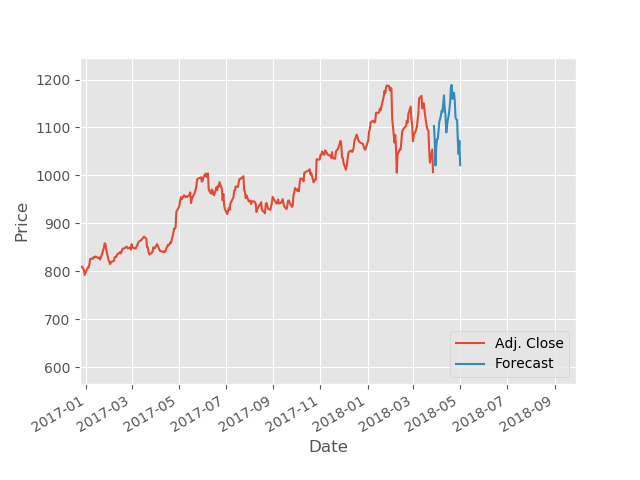

In [44]:
df['Adj. Close'].plot()
df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()